In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_5FP_RF_5FP_fold1_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.183173,-0.142023,0.171233,0.104783,-0.138406,-0.141667,0.453777,-0.085352,0.123714,-0.196879,...,0.227270,-0.169472,-0.107976,0.048568,0.207895,-0.152509,Abnormal,P52,FP-C,AB01
1,0.069722,0.112049,0.256392,0.569649,0.438293,-0.076159,0.737939,-0.044623,-0.176660,0.109250,...,-0.138969,0.387509,-0.174216,-0.133051,-0.114128,1.337209,Abnormal,P1,FP-A,AB02
2,0.043814,0.052640,0.775385,0.753716,0.062080,-0.130202,1.288857,-0.029463,-0.121414,0.103574,...,-0.207620,0.167637,-0.054157,-0.104977,0.108655,1.534377,Abnormal,P2,FP-A,AB02
3,-0.177954,-0.061284,0.522400,0.189064,-0.201108,-0.214785,0.600988,-0.189746,0.018161,-0.191795,...,0.134973,-0.143402,-0.184654,0.454986,0.312115,-0.127496,Abnormal,P51,FP-C,AB02
4,-0.185300,-0.005447,-0.178134,-0.163120,-0.194233,-0.114838,-0.174666,0.455459,0.201526,-0.073980,...,-0.163250,0.517986,0.012802,0.184158,0.373908,-0.160096,Abnormal,P42,FP-B,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.389022,0.303796,-0.201080,-0.154215,-0.053249,0.508389,-0.186184,0.672725,-0.111990,0.511201,...,-0.176340,0.919878,0.924155,-0.045925,-0.141010,-0.030481,Normal,P32,FP-B,Normal
4597,0.077332,0.019907,-0.178789,-0.170673,0.014434,0.193679,-0.191617,0.578476,0.155005,0.223425,...,-0.194791,0.321300,0.449924,-0.041723,0.031667,0.093323,Normal,P42,FP-B,Normal
4598,-0.198021,-0.169015,0.565406,0.414600,-0.183889,-0.196547,0.649491,-0.149529,0.394370,-0.218253,...,0.286358,-0.190014,-0.197364,0.461874,0.340785,-0.181225,Normal,P52,FP-C,Normal
4599,-0.193998,-0.178347,0.232987,0.250824,0.070464,-0.215060,0.165299,-0.015401,0.174173,-0.107838,...,0.820966,-0.060872,-0.204116,0.512624,0.199866,-0.122076,Normal,P61,FP-C,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(4601, 2048)
(4601,)


In [3]:
y[0]

'FP-C'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [5]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [6]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.987611,0.018138,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.987611,0.018138,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.987828,0.018271,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.988263,0.018375,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.988263,0.018272,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.988481,0.019028,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.988263,0.018375,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.988046,0.019008,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.988481,0.018371,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.988481,0.018473,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [7]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.9876110534754314

 **print the array of mean scores only 

[0.98761105 0.98761105 0.98782844 0.98826323 0.98826276 0.98848062
 0.98826323 0.98804631 0.98848062 0.98848062 0.98848062 0.98826323
 0.98826323 0.98804584 0.98848062 0.98848062 0.98826323 0.98826323
 0.98804584 0.98848062 0.98848062 0.98826323 0.98826323 0.98804584
 0.98848062]

 **examine the best model 

0.9884806186928227
{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=8, n_estimators=400, random_state=1)


In [8]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.9884806186928227


# setting parameters

In [9]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 8, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [10]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_5FP_RF_5FP_fold1_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [11]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,0.688897,0.481626,-0.204084,-0.138992,0.126013,0.171552,-0.202214,0.925737,0.272961,...,-0.188816,1.155643,0.912801,0.129452,0.003164,0.183335,Abnormal,P31,FP-B,AB01
1,1,0.208008,0.388320,-0.060117,0.012548,-0.023876,0.121292,0.201185,0.655834,0.022517,...,-0.194895,0.525116,0.281003,-0.047486,-0.037712,0.421807,Abnormal,P1,FP-A,AB01
2,2,-0.110854,-0.097531,0.228024,0.128375,0.112170,-0.180179,0.644814,-0.026187,-0.169307,...,-0.220559,0.162742,0.027353,-0.079745,-0.221458,0.937575,Abnormal,P2,FP-A,AB01
3,3,-0.165665,-0.149694,-0.207559,-0.110953,-0.129356,-0.048947,-0.213745,0.377276,-0.037325,...,-0.195455,0.059976,0.276703,0.018258,-0.154483,-0.044068,Abnormal,P42,FP-B,AB01
4,4,0.065224,0.377894,-0.216202,0.032931,0.103808,0.274854,-0.208061,0.745532,0.233987,...,-0.220736,0.710436,0.574746,0.210663,0.163345,-0.089435,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,-0.001885,0.366141,-0.134316,-0.086942,0.048504,0.060465,-0.179588,0.403197,0.261491,...,-0.049399,0.636152,0.190962,0.282361,-0.086646,0.049916,Normal,P32,FP-B,Normal
652,652,0.307874,0.290790,-0.201437,-0.076088,0.101540,0.364822,-0.158874,0.974933,0.055018,...,-0.209186,0.228965,0.872954,0.003071,0.047800,0.217753,Normal,P42,FP-B,Normal
653,653,-0.130830,-0.194390,0.296620,0.076171,-0.141220,-0.211505,0.549289,-0.187334,0.343873,...,0.406596,-0.168600,-0.159442,0.115177,0.315634,-0.140471,Normal,P52,FP-C,Normal
654,654,-0.183827,-0.189500,0.591210,0.176304,-0.118079,-0.211749,0.586772,-0.205030,0.465309,...,0.698599,-0.143482,-0.209706,0.413641,0.047328,-0.079114,Normal,P61,FP-C,Normal


In [12]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(656, 2048)
(656,)


In [13]:
y_test

0      FP-B
1      FP-A
2      FP-A
3      FP-B
4      FP-B
       ... 
651    FP-B
652    FP-B
653    FP-C
654    FP-C
655    FP-E
Name: Views, Length: 656, dtype: object

In [14]:
y_pred = modelOpt.predict(X_test)

In [15]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[121  13   2   0   1]
 [  4 182   6   0   3]
 [  1   3 182   5   0]
 [  0   0   4  94   0]
 [  0   3   0   1  31]]
              precision    recall  f1-score   support

        FP-A       0.96      0.88      0.92       137
        FP-B       0.91      0.93      0.92       195
        FP-C       0.94      0.95      0.95       191
        FP-D       0.94      0.96      0.95        98
        FP-E       0.89      0.89      0.89        35

    accuracy                           0.93       656
   macro avg       0.93      0.92      0.92       656
weighted avg       0.93      0.93      0.93       656



Text(0.5, 21.5, 'Predicted label')

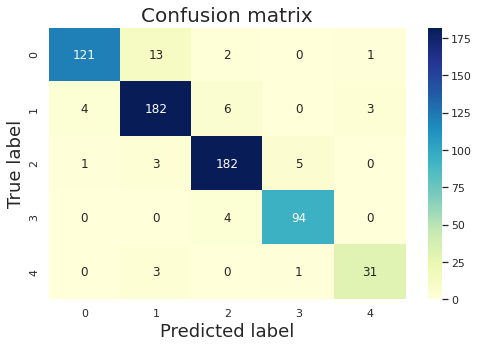

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [20]:
#TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
#print(TN, FP, FN, TP)

# Save Model

In [17]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_5FP_5FP_fold1_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)